In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
model_table = pd.read_csv('model_table.csv')

In [3]:
X = model_table.iloc[:,:14]
y = model_table['churn']

In [130]:
numeric = model_table.describe().columns.tolist()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=21)

In [5]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [6]:
X_train.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'length_contract',
       'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power'],
      dtype='object')

In [7]:
skew_feature = ['cons_12m','cons_gas_12m','imp_cons','net_margin','pow_max']
normal_feature = ['margin_net_pow_ele']
outlier_feature = ['offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']

In [8]:
from sklearn.preprocessing import StandardScaler
for x in skew_feature:
    scaler = StandardScaler()
    scaler.fit(X_train[x].values.reshape(-1,1))
    X_train[x] = scaler.transform(X_train[x].values.reshape(-1,1))
    X_test[x] = scaler.transform(X_test[x].values.reshape(-1,1))

In [9]:
from sklearn.preprocessing import MinMaxScaler
for x in normal_feature:
    scaler =  MinMaxScaler()
    scaler.fit(X_train[x].values.reshape(-1,1))
    X_train[x] = scaler.transform(X_train[x].values.reshape(-1,1))
    X_test[x] = scaler.transform(X_test[x].values.reshape(-1,1))

In [10]:
from sklearn.preprocessing import RobustScaler
for x in outlier_feature :
    scaler =  RobustScaler()
    scaler.fit(X_train[x].values.reshape(-1,1))
    X_train[x] = scaler.transform(X_train[x].values.reshape(-1,1))
    X_test[x] = scaler.transform(X_test[x].values.reshape(-1,1))

In [11]:
features_train = X_train
features_test = X_test
label_train = y_train
label_test = y_test

In [12]:
label_train.value_counts()

0    9226
1    9226
Name: churn, dtype: int64

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_lr = accuracy_score(pred_train,label_train)
accuracy_test_lr = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lr = precision_score(pred_train,label_train)
precision_test_lr = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lr = recall_score(pred_train,label_train)
recall_test_lr = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lr = f1_score(pred_train,label_train)
f1_test_lr = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lr = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lr = metrics.auc(fpr,tpr)
auc_overfitting_lr = auc_test_lr-auc_train_lr


pd.DataFrame({'accuracy_test':[accuracy_test_lr],'accuracy_train':[accuracy_train_lr],
             'precision_test':[precision_test_lr],'precision_train':[precision_train_lr],
             'recall_test':[recall_test_lr],'recall_train':[recall_train_lr],
             'f1_test':[f1_test_lr],'f1_train':[f1_train_lr],
             'auc_test':[auc_test_lr],'auc_train':[auc_train_lr]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.68188,0.621938,0.494062,0.529915,0.149748,0.649442,0.229834,0.583622,0.621383,0.668535


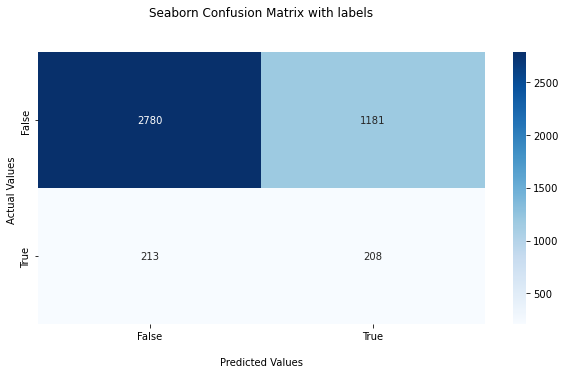

In [14]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Decision Tree

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_train_dct = accuracy_score(pred_train,label_train)
accuracy_test_dct = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_dct = precision_score(pred_train,label_train)
precision_test_dct = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_dct = recall_score(pred_train,label_train)
recall_test_dct = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_dct = f1_score(pred_train,label_train)
f1_test_dct = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_dct = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_dct = metrics.auc(fpr,tpr)
auc_overfitting_dct = auc_test_dct-auc_train_dct
pd.DataFrame({'accuracy_test':[accuracy_test_dct],'accuracy_train':[accuracy_train_dct],
             'precision_test':[precision_test_dct],'precision_train':[precision_train_dct],
             'recall_test':[recall_test_dct],'recall_train':[recall_train_dct],
             'f1_test':[f1_test_dct],'f1_train':[f1_train_dct],
             'auc_test':[auc_test_dct],'auc_train':[auc_train_dct]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.822227,1.0,0.258907,1.0,0.189236,1.0,0.218656,1.0,0.570504,1.0


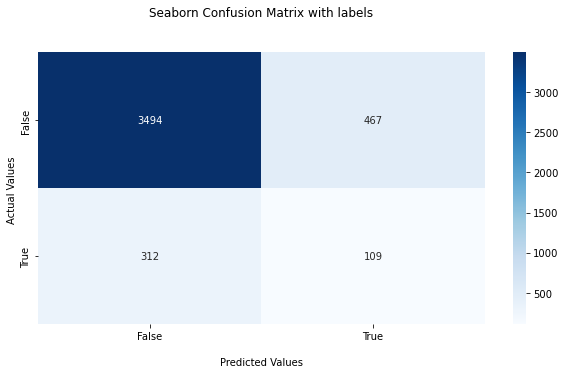

In [16]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Naive Baiyes

In [17]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nb = accuracy_score(pred_train,label_train)
accuracy_test_nb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nb = precision_score(pred_train,label_train)
precision_test_nb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nb = recall_score(pred_train,label_train)
recall_test_nb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nb = f1_score(pred_train,label_train)
f1_test_nb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nb = metrics.auc(fpr,tpr)
auc_overfitting_nb = auc_test_nb-auc_train_nb
pd.DataFrame({'accuracy_test':[accuracy_test_nb],'accuracy_train':[accuracy_train_nb],
             'precision_test':[precision_test_nb],'precision_train':[precision_train_nb],
             'recall_test':[recall_test_nb],'recall_train':[recall_train_nb],
             'f1_test':[f1_test_nb],'f1_train':[f1_train_nb],
             'auc_test':[auc_test_nb],'auc_train':[auc_train_nb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.193747,0.52791,0.938242,0.940603,0.10123,0.51529,0.182743,0.665823,0.620634,0.659307


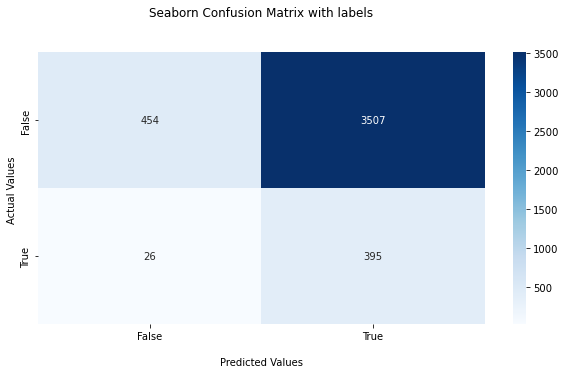

In [18]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Linear SVC

In [19]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
clf = LinearSVC()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train_svc = accuracy_score(pred_train,label_train)
accuracy_test_svc = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_svc = precision_score(pred_train,label_train)
precision_test_svc = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_svc = recall_score(pred_train,label_train)
recall_test_svc = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_svc = f1_score(pred_train,label_train)
f1_test_svc = f1_score(pred_test,label_test)

from sklearn import metrics
clf_new = CalibratedClassifierCV(clf)
clf_new.fit(features_train,label_train)
pred_proba = clf_new.predict_proba(features_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf_new.predict_proba(features_train)[:,1])
auc_train_svc = metrics.auc(fpr,tpr)
fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf_new.predict_proba(features_test)[:,1])
auc_test_svc = metrics.auc(fpr,tpr)
auc_overfitting_svc = auc_test_svc-auc_train_svc
pd.DataFrame({'accuracy_test':[accuracy_test_svc],'accuracy_train':[accuracy_train_svc],
             'precision_test':[precision_test_svc],'precision_train':[precision_train_svc],
             'recall_test':[recall_test_svc],'recall_train':[recall_train_svc],
             'f1_test':[f1_test_svc],'f1_train':[f1_train_svc],
             'auc_test':[auc_test_svc],'auc_train':[auc_train_svc]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.405751,0.629579,0.712589,0.872643,0.107797,0.587193,0.187266,0.70201,0.605342,0.729918


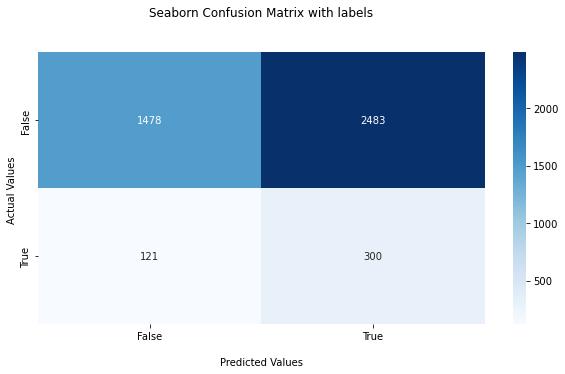

In [20]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced')

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(pred_train,label_train)
accuracy_test_rf = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_rf = precision_score(pred_train,label_train)
precision_test_rf = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_rf = recall_score(pred_train,label_train)
recall_test_rf = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_rf = f1_score(pred_train,label_train)
f1_test_rf = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_rf = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_rf = metrics.auc(fpr,tpr)
auc_overfitting_rf = auc_test_rf-auc_train_rf


pd.DataFrame({'accuracy_test':[accuracy_test_rf],'accuracy_train':[accuracy_train_rf],
             'precision_test':[precision_test_rf],'precision_train':[precision_train_rf],
             'recall_test':[recall_test_rf],'recall_train':[recall_train_rf],
             'f1_test':[f1_test_rf],'f1_train':[f1_train_rf],
             'auc_test':[auc_test_rf],'auc_train':[auc_train_rf]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.89183,1.0,0.11639,1.0,0.324503,1.0,0.171329,1.0,0.666588,1.0


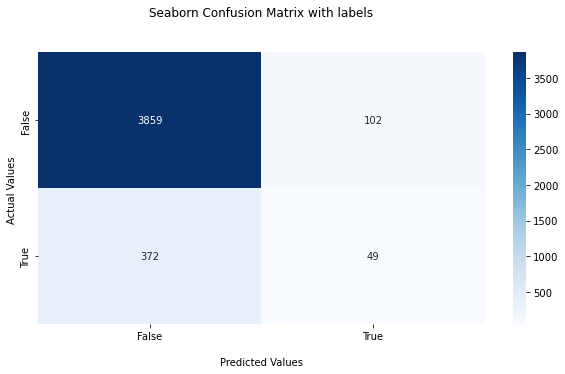

In [22]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_gb = accuracy_score(pred_train,label_train)
accuracy_test_gb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_gb = precision_score(pred_train,label_train)
precision_test_gb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_gb = recall_score(pred_train,label_train)
recall_test_gb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_gb = f1_score(pred_train,label_train)
f1_test_gb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_gb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_gb = metrics.auc(fpr,tpr)
auc_overfitting_gb = auc_test_gb-auc_train_gb

pd.DataFrame({'accuracy_test':[accuracy_test_gb],'accuracy_train':[accuracy_train_gb],
             'precision_test':[precision_test_gb],'precision_train':[precision_train_gb],
             'recall_test':[recall_test_gb],'recall_train':[recall_train_gb],
             'f1_test':[f1_test_gb],'f1_train':[f1_train_gb],
             'auc_test':[auc_test_gb],'auc_train':[auc_train_gb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.886581,0.903263,0.052257,0.828095,0.183333,0.974614,0.081331,0.8954,0.631322,0.952604


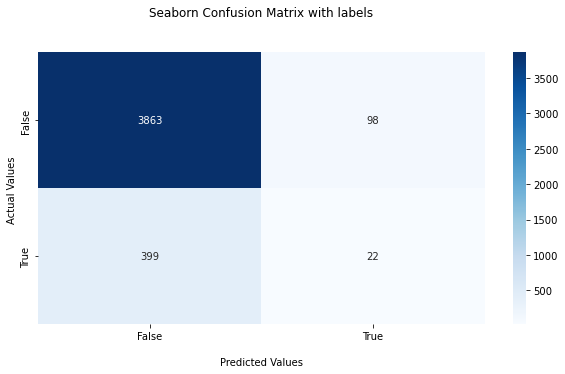

In [24]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Light GBM

In [25]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_lgb = accuracy_score(pred_train,label_train)
accuracy_test_lgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_lgb = precision_score(pred_train,label_train)
precision_test_lgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_lgb = recall_score(pred_train,label_train)
recall_test_lgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_lgb = f1_score(pred_train,label_train)
f1_test_lgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_lgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_lgb = metrics.auc(fpr,tpr)
auc_overfitting_lgb = auc_test_lgb-auc_train_lgb

pd.DataFrame({'accuracy_test':[accuracy_test_lgb],'accuracy_train':[accuracy_train_lgb],
             'precision_test':[precision_test_lgb],'precision_train':[precision_train_lgb],
             'recall_test':[recall_test_lgb],'recall_train':[recall_train_lgb],
             'f1_test':[f1_test_lgb],'f1_train':[f1_train_lgb],
             'auc_test':[auc_test_lgb],'auc_train':[auc_train_lgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.900274,0.949978,0.085511,0.904401,0.409091,0.99511,0.141454,0.94759,0.659456,0.986249


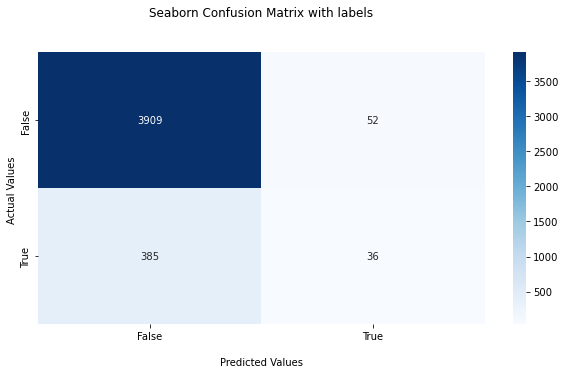

In [26]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## XGBoost

In [27]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

pd.DataFrame({'accuracy_test':[accuracy_test_xgb],'accuracy_train':[accuracy_train_xgb],
             'precision_test':[precision_test_xgb],'precision_train':[precision_train_xgb],
             'recall_test':[recall_test_xgb],'recall_train':[recall_train_xgb],
             'f1_test':[f1_test_xgb],'f1_train':[f1_train_xgb],
             'auc_test':[auc_test_xgb],'auc_train':[auc_train_xgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.899361,0.971439,0.111639,0.944505,0.412281,0.998282,0.175701,0.970649,0.666607,0.996895


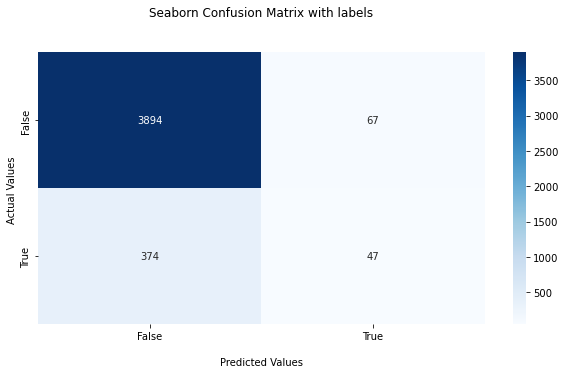

In [28]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Neural Network

In [29]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_nn = accuracy_score(pred_train,label_train)
accuracy_test_nn = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_nn = precision_score(pred_train,label_train)
precision_test_nn = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_nn = recall_score(pred_train,label_train)
recall_test_nn = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_nn = f1_score(pred_train,label_train)
f1_test_nn = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_nn = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_nn = metrics.auc(fpr,tpr)
auc_overfitting_nn = auc_test_nn-auc_train_nn


pd.DataFrame({'accuracy_test':[accuracy_test_nn],'accuracy_train':[accuracy_train_nn],
             'precision_test':[precision_test_nn],'precision_train':[precision_train_nn],
             'recall_test':[recall_test_nn],'recall_train':[recall_train_nn],
             'f1_test':[f1_test_nn],'f1_train':[f1_train_nn],
             'auc_test':[auc_test_nn],'auc_train':[auc_train_nn]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.408489,0.609311,0.781473,0.847605,0.116296,0.574029,0.202462,0.684494,0.59011,0.656428


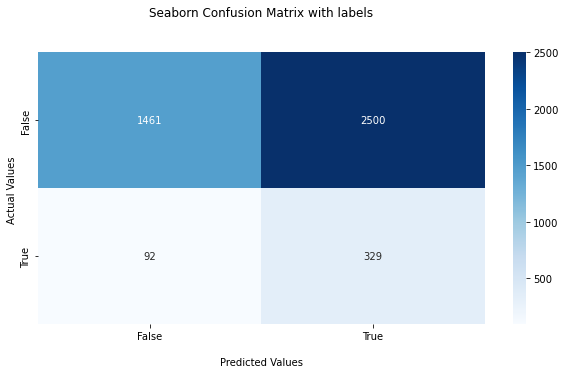

In [30]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

## Summary Model Performance

In [31]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Neural Network','Linear SVC','Naive Baiyes','Gradient Boosting'],
                          'AUC Test':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_nn,auc_test_svc,auc_test_nb,auc_test_gb])*100),
                           'AUC Train':list(np.array([auc_train_lr,auc_train_dct,auc_train_rf,auc_train_xgb,auc_train_lgb,auc_train_nn,auc_train_svc,auc_train_nb,auc_train_gb])*100),
                           'Recall Test':list(np.array([recall_test_lr,recall_test_dct,recall_test_rf,recall_test_xgb,recall_test_lgb,recall_test_nn,recall_test_svc,recall_test_nb,recall_test_gb])*100),
                          'Recall Train':list(np.array([recall_train_lr,recall_train_dct,recall_train_rf,recall_train_xgb,recall_train_lgb,recall_train_nn,recall_train_svc,recall_train_nb,recall_train_gb])*100)})
kesimpulan.sort_values('Recall Test',ascending=False)

,Model,AUC Test,AUC Train,Recall Test,Recall Train
3,XGBoost,66.660690,99.689510,41.228070,99.828159
4,Light GBM,65.945552,98.624881,40.909091,99.511032
2,Random Forest,66.658831,100.000000,32.450331,100.000000
1,Decision Tree,57.050392,100.000000,18.923611,100.000000
8,Gradient Boosting,63.132226,95.260403,18.333333,97.461411
0,Linear Regression,62.138331,66.853550,14.974802,64.944208
5,Neural Network,59.011047,65.642768,11.629551,57.402922
6,Linear SVC,60.534151,72.991821,10.779734,58.719276
7,Naive Baiyes,62.063372,65.930672,10.123014,51.529007


In [32]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Neural Network','Linear SVC','Naive Baiyes','Gradient Boosting'],
                          'AUC Test':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_nn,auc_test_svc,auc_test_nb,auc_test_gb])*100),
                           'AUC Train':list(np.array([auc_train_lr,auc_train_dct,auc_train_rf,auc_train_xgb,auc_train_lgb,auc_train_nn,auc_train_svc,auc_train_nb,auc_train_gb])*100),
                           'Precision Test':list(np.array([precision_test_lr,precision_test_dct,precision_test_rf,precision_test_xgb,precision_test_lgb,precision_test_nn,precision_test_svc,precision_test_nb,precision_test_gb])*100),
                          'Precision Train':list(np.array([precision_train_lr,precision_train_dct,precision_train_rf,precision_train_xgb,precision_train_lgb,precision_train_nn,precision_train_svc,precision_train_nb,precision_train_gb])*100)})
kesimpulan.sort_values('Precision Test',ascending=False)

,Model,AUC Test,AUC Train,Precision Test,Precision Train
7,Naive Baiyes,62.063372,65.930672,93.824228,94.060264
5,Neural Network,59.011047,65.642768,78.147268,84.760460
6,Linear SVC,60.534151,72.991821,71.258907,87.264253
0,Linear Regression,62.138331,66.853550,49.406176,52.991546
1,Decision Tree,57.050392,100.000000,25.890736,100.000000
2,Random Forest,66.658831,100.000000,11.638955,100.000000
3,XGBoost,66.660690,99.689510,11.163895,94.450466
4,Light GBM,65.945552,98.624881,8.551069,90.440061
8,Gradient Boosting,63.132226,95.260403,5.225653,82.809452


In [33]:
kesimpulan = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost','Light GBM','Neural Network','Linear SVC','Naive Baiyes','Gradient Boosting'],
                          'AUC Test':list(np.array([auc_test_lr,auc_test_dct,auc_test_rf,auc_test_xgb,auc_test_lgb,auc_test_nn,auc_test_svc,auc_test_nb,auc_test_gb])*100),
                           'AUC Train':list(np.array([auc_train_lr,auc_train_dct,auc_train_rf,auc_train_xgb,auc_train_lgb,auc_train_nn,auc_train_svc,auc_train_nb,auc_train_gb])*100),
                           'Accuracy Test':list(np.array([accuracy_test_lr,accuracy_test_dct,accuracy_test_rf,accuracy_test_xgb,accuracy_test_lgb,accuracy_test_nn,accuracy_test_svc,accuracy_test_nb,accuracy_test_gb])*100),
                          'Accuracy Train':list(np.array([accuracy_train_lr,accuracy_train_dct,accuracy_train_rf,accuracy_train_xgb,accuracy_train_lgb,accuracy_train_nn,accuracy_train_svc,accuracy_train_nb,accuracy_train_gb])*100)})
kesimpulan.sort_values('Accuracy Test',ascending=False)

,Model,AUC Test,AUC Train,Accuracy Test,Accuracy Train
4,Light GBM,65.945552,98.624881,90.027385,94.997832
3,XGBoost,66.660690,99.689510,89.936102,97.143941
2,Random Forest,66.658831,100.000000,89.183021,100.000000
8,Gradient Boosting,63.132226,95.260403,88.658147,90.326252
1,Decision Tree,57.050392,100.000000,82.222729,100.000000
0,Linear Regression,62.138331,66.853550,68.188042,62.193800
5,Neural Network,59.011047,65.642768,40.848927,60.931064
6,Linear SVC,60.534151,72.991821,40.575080,62.957945
7,Naive Baiyes,62.063372,65.930672,19.374715,52.791025


**Data Insight**

XGBoost will be choosen because high recall and AUC. That's model can approach more churn customer than other model efficiently.

# Hyperparameter Tuning

Hyperparameter can focused to optimize the parameter and make the model more robust than base model.

Hyperparameter can focused to increase the recall to decrease the false-negatif

## Base Model

In [291]:
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

pd.DataFrame({'accuracy_test':[accuracy_test_xgb],'accuracy_train':[accuracy_train_xgb],
             'precision_test':[precision_test_xgb],'precision_train':[precision_train_xgb],
             'recall_test':[recall_test_xgb],'recall_train':[recall_train_xgb],
             'f1_test':[f1_test_xgb],'f1_train':[f1_train_xgb],
             'auc_test':[auc_test_xgb],'auc_train':[auc_train_xgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.899361,0.971439,0.111639,0.944505,0.412281,0.998282,0.175701,0.970649,0.666607,0.996895


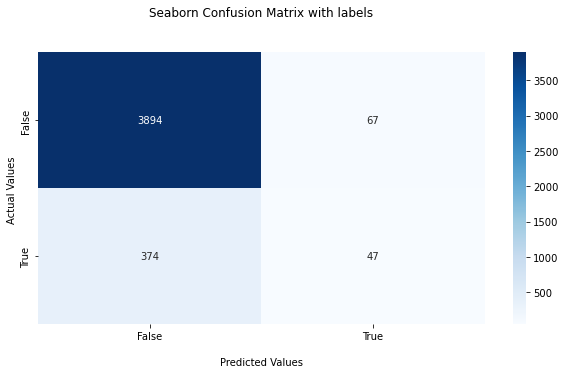

In [284]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

In [288]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
param_grid = { 
    # Percentage of columns to be randomly samples for each tree.
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha provides l1 regularization to the weight, higher values result in more conservative models
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda provides l2 regularization to the weight, higher values result in more conservative models
    "reg_lambda": [0, 0.5, 1, 5]
    }
# Set up score
scoring = ['recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [292]:
import xgboost as xgb
# Define grid search
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='recall', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(features_train,label_train)
# Print grid search summary
grid_result
# Print the best score and the corresponding hyperparameters
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8990
The best score standard deviation is 0.0027
The best hyperparameters are {'colsample_bytree': 0.8, 'reg_alpha': 0.5, 'reg_lambda': 0.5}


# Impact for Business Metrics

In [342]:
import xgboost as xgb
clf = xgb.XGBClassifier(colsample_bytree= 0.8, reg_alpha= 0.5,reg_lambda= 0.5)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

pd.DataFrame({'accuracy_test':[accuracy_test_xgb],'accuracy_train':[accuracy_train_xgb],
             'precision_test':[precision_test_xgb],'precision_train':[precision_train_xgb],
             'recall_test':[recall_test_xgb],'recall_train':[recall_train_xgb],
             'f1_test':[f1_test_xgb],'f1_train':[f1_train_xgb],
             'auc_test':[auc_test_xgb],'auc_train':[auc_train_xgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.898905,0.973228,0.118765,0.94754,0.409836,0.998857,0.184162,0.972522,0.665331,0.996783


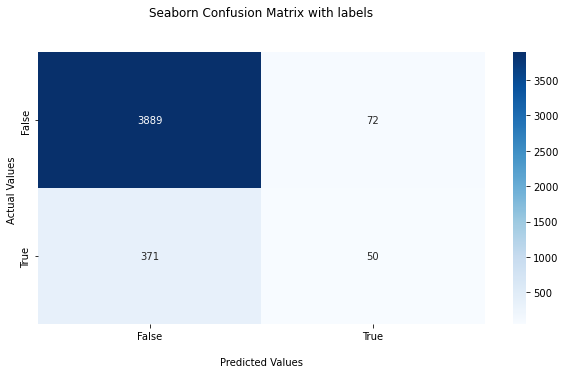

In [343]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap((confusion_matrix(label_test,pred_test)), annot=True, cmap='Blues', fmt='g')



ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


## Display the visualization of the Confusion Matrix.
plt.show()

In [344]:
client = pd.read_csv('client_data.csv')

In [345]:
price = pd.read_csv('price_data.csv')

In [346]:
X = client.drop('churn',axis=1)
y = model_table['churn']

In [347]:
from sklearn.model_selection import train_test_split
X_train_business, X_test_business, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=21)

In [348]:
X_test_business['label_test'] = label_test

In [349]:
X_test_business['label_pred'] = pred_test

In [350]:
X_test_business['pred_prob'] = pred_proba

In [351]:
X_test_business

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,label_test,label_pred,pred_prob
10992,cde7e58c25b60ee66df70b1fd26363d5,lmkebamcaaclubfxadlmueccxoimlema,2940360,155531,269980,2010-11-26,2016-11-26,2010-11-26,2015-11-27,1467.84,...,4.83,4.83,2,134.54,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.350,0,0,0.001375
13559,1b998ba935afe9d61fa94177501efad7,MISSING,12752,0,0,2009-09-11,2016-09-03,2015-09-03,2014-09-12,1285.56,...,11.95,11.95,2,75.64,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0,0.059737
13402,073b1aefdf0d99049952cab892a4f274,foosdfpfkusacimwkcsosbicdxkicaua,983659,0,192253,2012-03-15,2016-03-15,2012-03-15,2015-03-16,917.26,...,27.14,27.14,1,103.59,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,0,0,0.041740
9463,a82964ec7bcf43aab87191bbe4c91e25,MISSING,5055,2848,0,2009-12-17,2016-12-03,2015-11-01,2015-12-04,749.42,...,3.24,3.24,2,68.40,6,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,0,0.018563
12748,7b4d57c7890d389b72fda5e2bdfe7509,usilxuppasemubllopkaafesmlibmsdf,3981,0,1169,2012-12-31,2016-12-31,2012-12-31,2016-01-01,1079.39,...,0.12,0.12,1,373.07,3,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,0,0.327939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,b9e126f2a62cc9708311d4eaf3ec36b8,usilxuppasemubllopkaafesmlibmsdf,44551,0,3529,2011-08-26,2016-08-26,2015-07-11,2015-08-27,191.65,...,23.64,23.64,1,22.75,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,21.000,0,0,0.015358
4465,f8a925b570b5094e3706add741536b39,foosdfpfkusacimwkcsosbicdxkicaua,3178,0,0,2009-08-21,2016-08-21,2015-06-17,2015-08-24,469.67,...,16.38,16.38,1,36.78,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0,0.116406
5943,dd256147f4c951bb49ae906bc483dbfe,foosdfpfkusacimwkcsosbicdxkicaua,29160,0,3552,2010-08-14,2016-08-14,2010-08-14,2015-08-16,3017.46,...,12.36,12.36,1,367.32,5,lxidpiddsbxsbosboudacockeimpuepw,19.700,0,0,0.275293
6173,009c4f0e98c8dc8bd69f318724b2f1d5,foosdfpfkusacimwkcsosbicdxkicaua,17285,0,3947,2011-11-01,2016-11-01,2011-11-01,2015-11-02,2193.78,...,7.59,7.59,1,230.58,4,lxidpiddsbxsbosboudacockeimpuepw,40.000,0,0,0.036500


In [352]:
total_margin = round(X_test_business['net_margin'].sum())
discount_20 = round(X_test_business['net_margin'].sum()*0.2)
margin_churn_customer = round(X_test_business[X_test_business['label_test']==1]['net_margin'].sum())

In [353]:
discount_20_churn_customer = round(X_test_business[(X_test_business['label_pred']==1)]['net_margin'].sum()*0.2)

In [354]:
total_margin_model = round(X_test_business[(X_test_business['label_pred']==1)|(X_test_business['label_test']==0)]['net_margin'].sum())

In [355]:
model_churn_customer = X_test_business[(X_test_business['label_pred']==1)&(X_test_business['label_test']==1)]['id'].count()

In [356]:
total_churn_customer = X_test_business[(X_test_business['label_test']==1)]['id'].count()

In [357]:
print('Total net margin per year $',total_margin)

Total net margin per year $ 825839


In [358]:
print('Total net margin + 20% discount $',total_margin - discount_20)

Total net margin + 20% discount $ 660671


In [359]:
print('total 20% discount without model $',discount_20)

total 20% discount without model $ 165168


In [360]:
print('Potential revenue by lost churn customer $',margin_churn_customer)

Potential revenue by lost churn customer $ 86827


In [361]:
print('total 20% discount with model $',discount_20_churn_customer)

total 20% discount with model $ 6077


In [362]:
print('predicted margin without model $',total_margin - margin_churn_customer)

predicted margin without model $ 739012


In [363]:
print('predicted margin with model $',total_margin_model - discount_20_churn_customer)

predicted margin with model $ 743036


In [364]:
print('predicted churn customer with model',model_churn_customer)

predicted churn customer with model 50


In [365]:
print('total churn customer with model',total_churn_customer)

total churn customer with model 421


**Data Insight**

steeped discount must applied to reduce margin lost. Deciling score can be consideration to steeped discount.

## Deciling the score

In [366]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['TARGET'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,target,nontarget):
    inputs = list(decile_by)
    inputs.extend((target,nontarget))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]
    agg1['TARGET'] = grouped.sum()[target]
    agg1['NONTARGET'] = grouped.sum()[nontarget]
    agg1['PCT_TAR'] = grouped.mean()[target]*100
    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()
    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()
    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100
    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

In [367]:
def scoring(features,clf,target):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['TARGET'] = target
    score['NONTARGET'] = 1 - target
    return(score)

In [368]:
scores_train = scoring(features_train,clf,label_train)

In [369]:
deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

,TOTAL,TARGET,NONTARGET,PCT_TAR,CUM_TAR,CUM_NONTAR,DIST_TAR,DIST_NONTAR,SPREAD
DECILE,,,,,,,,,
0.000000,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.000000,1846,1846,0,100.000000,1846,0,20.008671,0.000000,20.008671
2.000000,1845,1845,0,100.000000,3691,0,40.006503,0.000000,40.006503
3.000000,1845,1845,0,100.000000,5536,0,60.004336,0.000000,60.004336
4.000000,1845,1845,0,100.000000,7381,0,80.002168,0.000000,80.002168
5.000000,1845,1640,205,88.888889,9021,205,97.778019,2.221981,95.556037
6.000000,1845,165,1680,8.943089,9186,1885,99.566443,20.431390,79.135053
7.000000,1845,27,1818,1.463415,9213,3703,99.859094,40.136571,59.722523
8.000000,1845,9,1836,0.487805,9222,5539,99.956644,60.036852,39.919792


In [370]:
scores_train.to_excel('score-train.xlsx',index=False)

In [371]:
table_score = scores_train.groupby('DECILE').agg({'SCORE':['min','max']}).reset_index()

In [372]:
table_score.columns = ['DECILE','min','max']

In [373]:
table_score

,DECILE,min,max
0,1.0,0.999578,0.999988
1,2.0,0.998212,0.999578
2,3.0,0.991312,0.998212
3,4.0,0.940309,0.991310
4,5.0,0.281881,0.940309
5,6.0,0.110705,0.281575
6,7.0,0.065843,0.110705
7,8.0,0.041303,0.065818
8,9.0,0.022292,0.041289
9,10.0,0.000065,0.022288


**Data Insight**

DECILE with higher than 6 have litle probability to churn <1%. We can applied discount start from DECILE 5.

categorize DECILE :

    0-1 : Lost Customer
    2-3 : Risk to Lost
    4-5 : General Customer
    6-9 : Loyal Customer

In [374]:
bins = sorted(np.array(table_score['max']))

In [375]:
array= np.array(X_test_business['pred_prob'])

In [376]:
bin_indices  = np.digitize(array, bins)
bin_indices = list(bin_indices)

In [410]:
X_test_business['DECILE'] = bin_indices

In [411]:
discount_10 = round(X_test_business[(X_test_business['DECILE']<=5)&(X_test_business['DECILE']>=4)]['net_margin'].sum()*0.1)

In [412]:
discount_20 = round(X_test_business[(X_test_business['DECILE']<=3)&(X_test_business['DECILE']>=2)]['net_margin'].sum()*0.2)

In [413]:
total_discount = discount_10 + discount_20

In [414]:
total_margin_model = round(X_test_business[(X_test_business['DECILE']<=5)&(X_test_business['DECILE']>=2)|(X_test_business['label_test']==0)]['net_margin'].sum())

In [415]:
model_churn_customer = X_test_business[(X_test_business['DECILE']<=5)&(X_test_business['DECILE']>=2)&(X_test_business['label_test']==1)]['id'].count()

In [416]:
print('predicted margin with model $',total_margin_model - total_discount)

predicted margin with model $ 733816


In [417]:
print('predicted churn customer with model',model_churn_customer)

predicted churn customer with model 338


<AxesSubplot:xlabel='DECILE', ylabel='id'>

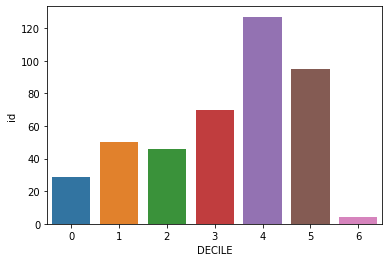

In [392]:
customer_churn = X_test_business[X_test_business['label_test']==1]
customer_churn = customer_churn.groupby('DECILE')['id'].count().reset_index()
sns.barplot(x='DECILE',y='id',data=customer_churn)

**Data Insight**

We can choose deceiling scoring to reach more churn customer but we lost much in revenue because not all customer is profitable.

## Feature Importance

In [418]:
import xgboost as xgb
clf = xgb.XGBClassifier(colsample_bytree= 0.8, reg_alpha= 0.5,reg_lambda= 0.5)

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)
pred_proba = clf.predict_proba(features_test)[:,1]


from sklearn.metrics import accuracy_score
accuracy_train_xgb = accuracy_score(pred_train,label_train)
accuracy_test_xgb = accuracy_score(pred_test,label_test)

from sklearn.metrics import precision_score
precision_train_xgb = precision_score(pred_train,label_train)
precision_test_xgb = precision_score(pred_test,label_test)

from sklearn.metrics import recall_score
recall_train_xgb = recall_score(pred_train,label_train)
recall_test_xgb = recall_score(pred_test,label_test)

from sklearn.metrics import f1_score
f1_train_xgb = f1_score(pred_train,label_train)
f1_test_xgb = f1_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
auc_train_xgb = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
auc_test_xgb = metrics.auc(fpr,tpr)
auc_overfitting_xgb = auc_test_xgb-auc_train_xgb

pd.DataFrame({'accuracy_test':[accuracy_test_xgb],'accuracy_train':[accuracy_train_xgb],
             'precision_test':[precision_test_xgb],'precision_train':[precision_train_xgb],
             'recall_test':[recall_test_xgb],'recall_train':[recall_train_xgb],
             'f1_test':[f1_test_xgb],'f1_train':[f1_train_xgb],
             'auc_test':[auc_test_xgb],'auc_train':[auc_train_xgb]})

,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train,f1_test,f1_train,auc_test,auc_train
0,0.898905,0.973228,0.118765,0.94754,0.409836,0.998857,0.184162,0.972522,0.665331,0.996783


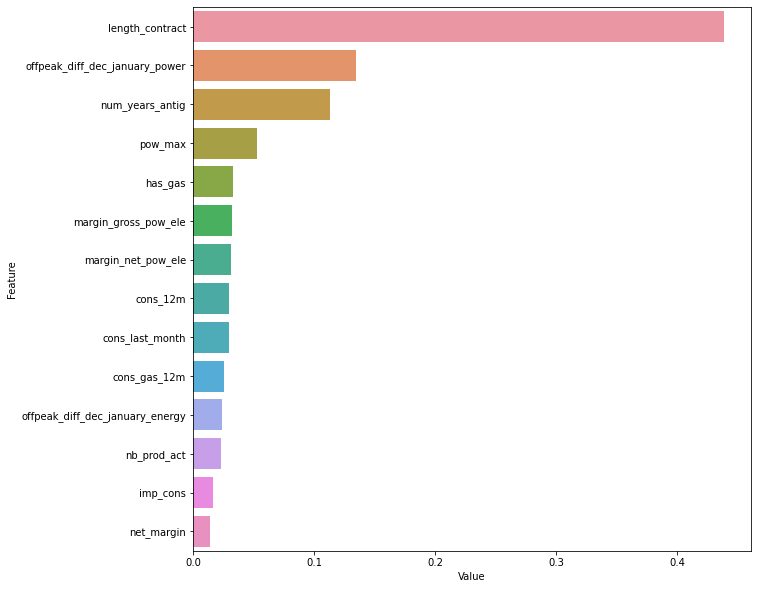

In [422]:
X_train_col = X_train
X_test_col = X_test
features_important = pd.DataFrame({'Feature':X_train_col.columns.tolist(),
                          'Value':list(clf.feature_importances_)})
features_important = features_important.sort_values('Value',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x='Value',y='Feature',data=features_important)
plt.show()

In [425]:
column_important = features_important['Feature'].tolist()

### Length of Contract